In [53]:
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite
import pandas as pd

****Heterologous expression of 5-HTP and MH4 pathway in Bacillus subtilis****

In [54]:
model = read_sbml_model('data/iYO844.xml')

In [55]:
model

Name,iYO844
Memory address,0x07fe084555b50
Number of metabolites,990
Number of reactions,1250
Number of groups,0
Objective expression,1.0*BIOMASS_BS_10 - 1.0*BIOMASS_BS_10_reverse_8788b
Compartments,"cytosol, extracellular space"


In [56]:
model.medium

{'EX_fe3_e': 999999.0,
 'EX_glc__D_e': 1.7,
 'EX_ca2_e': 999999.0,
 'EX_so4_e': 5.0,
 'EX_co2_e': 999999.0,
 'EX_h2o_e': 999999.0,
 'EX_h_e': 999999.0,
 'EX_k_e': 999999.0,
 'EX_mg2_e': 999999.0,
 'EX_na1_e': 999999.0,
 'EX_nh4_e': 5.0,
 'EX_o2_e': 999999.0,
 'EX_pi_e': 5.0}

In [57]:
for metabolite in model.metabolites.query('Formate', 'name'):
    print(metabolite.name, metabolite.id)

Formate for_c
Formate for_e


In [58]:
for metabolite in model.metabolites.query('GTP', 'name'):
    print(metabolite.name, metabolite.id)

DGTP C10H12N5O13P3 dgtp_c
GTP C10H12N5O14P3 gtp_c


In [59]:
for metabolite in model.metabolites.query('H2O', 'name'):
    print(metabolite.name, metabolite.id)

H2O H2O h2o_c
H2O H2O h2o_e
Oxaloglycolate C4H2O6 oxglyc_c
Sulfoacetate C2H2O5S sula_c
Sulfoacetate C2H2O5S sula_e


In [60]:
for metabolite in model.metabolites.query('Inorganic triphosphate', 'name'):
    print(metabolite.name, metabolite.id, metabolite.formula)

Inorganic triphosphate pppi_c HO10P3


In [61]:
for metabolite in model.metabolites.query('Nicotinamide', 'name'):
    print(metabolite.name, metabolite.id)

Nicotinamide adenine dinucleotide nad_c
Nicotinamide adenine dinucleotide - reduced nadh_c
Nicotinamide adenine dinucleotide phosphate nadp_c
Nicotinamide adenine dinucleotide phosphate - reduced nadph_c
Nicotinamide ncam_c


In [62]:
model.metabolites.h_c 

Metabolite identifier,h_c
Name,H+
Memory address,0x07fe084729dc0
Formula,H
Compartment,c
In 616 reaction(s),"DADNK, ACOAD6, SHCHD2_1, CAt4, PGL, DIPEPabc9, NAPRT, CITt12, DIPEPabc7, GLXt2, MNt2, KAS7, G6PDH2r, GPDDA1, DCMPDA, PYK, GLTPD, METDabc, LAAL24, LAAL13, HACD5, OXGDC, CITt10, DRBK, GLCS1, MTHFR3,..."


In [63]:
for metabolite in model.metabolites.query('pterin', 'name'):
    print(metabolite.name, metabolite.id, metabolite.formula)

6-Pyruvoyl-5,6,7,8-tetrahydropterin 6pthp_c C9H11N5O3
Dihydroneopterin dhnpt_c C9H13N5O4


In [64]:
for metabolite in model.metabolites.query('Tryptophan', 'name'):
    print(metabolite.name, metabolite.id)

L-Tryptophan trp__L_c
L-Tryptophan trp__L_e


In [65]:
for metabolite in model.metabolites.query('O2 O2', 'name'):
    print(metabolite.name, metabolite.id)

O2 O2 o2_c
O2 O2 o2_e


In [66]:
MH2_3P = Metabolite(id='MH2_3P', compartment='c')

In [67]:
preMH2_3P = Metabolite(id='preMH2_3P', compartment='c')

In [68]:
MH2 = Metabolite(id='MH2', compartment='c')

In [69]:
MH4 = Metabolite(id='MH4', compartment='c')

In [70]:
HydroxyMH4 = Metabolite(id='hydroxy_MH4', compartment='c')

In [71]:
hydroxy_trp = Metabolite (id='hydroxy_trp', compartment='c')

In [72]:
folE = Reaction('R05048')
folE.add_metabolites({model.metabolites.h2o_c: -1,
                      model.metabolites.gtp_c: -1,
                      model.metabolites.for_c: 1,
                      preMH2_3P: 1
                     })
print(folE.build_reaction_string())

gtp_c + h2o_c --> for_c + preMH2_3P


In [73]:
folX = Reaction('R11082')
folX.add_metabolites({preMH2_3P: -1,
                      MH2_3P: 1
                     })
print(folX.build_reaction_string())

preMH2_3P --> MH2_3P


In [74]:
MH2_3P_dephosphorylation = Reaction ('Putative_dephosphorylation')
MH2_3P_dephosphorylation.add_metabolites({MH2_3P: -1,
                                          MH2: 1,
                                          model.metabolites.pppi_c: 1
                                         })
print(MH2_3P_dephosphorylation.build_reaction_string())

MH2_3P --> MH2 + pppi_c


In [75]:
folM = Reaction('R11019')
folM.add_metabolites ({model.metabolites.nadph_c: -1,
                       model.metabolites.h_c: -1,
                       MH2: -1,
                       MH4: 1,
                       model.metabolites.nadp_c: 1
                      })
print(folM.build_reaction_string())

MH2 + h_c + nadph_c --> MH4 + nadp_c


In [76]:
phhB = Reaction ('R04734')
phhB.add_metabolites({HydroxyMH4: -1,
                      MH2: 1,
                      model.metabolites.h2o_c: 1
                     })
print(phhB.build_reaction_string())

hydroxy_MH4 --> MH2 + h2o_c


In [77]:
phhA = Reaction ('R12540')
phhA.add_metabolites({model.metabolites.trp__L_c: -1,
                      model.metabolites.o2_c: -1,
                      MH4: -1,
                      HydroxyMH4: 1,
                      hydroxy_trp: 1
                     })
print(phhA.build_reaction_string())

MH4 + o2_c + trp__L_c --> hydroxy_MH4 + hydroxy_trp


In [78]:
model.add_reactions([folE])

In [79]:
model.add_reactions([folX])

In [80]:
model.add_reactions([MH2_3P_dephosphorylation])

In [81]:
model.add_reactions([folM])

In [82]:
model.add_reactions([phhB])

In [83]:
model.add_reactions([phhA])

In [84]:
model.reactions.R12540

Reaction identifier,R12540
Name,
Memory address,0x07fe081ba9100
Stoichiometry,MH4 + o2_c + trp__L_c --> hydroxy_MH4 + hydroxy_trp + O2 O2 + L-Tryptophan --> +
GPR,
Lower bound,0.0
Upper bound,1000.0


In [85]:
hydroxy_5HTP_exchange = Reaction('EX_hydroxy_trp')
hydroxy_5HTP_exchange.add_metabolites({model.metabolites.hydroxy_trp: -1})
model.add_reactions([hydroxy_5HTP_exchange])

In [86]:
MH4_exchange = Reaction('EX_MH4')
MH4_exchange.add_metabolites({model.metabolites.MH4: -1})
model.add_reactions([MH4_exchange])

In [87]:
model.optimize()

,fluxes,reduced_costs
EX_etha_e,0.0,-0.066773
EX_drib_e,0.0,-0.150240
EX_csn_e,0.0,-0.129837
EX_5mtr_e,0.0,-0.224433
EX_dtmp_e,0.0,-0.337577
...,...,...
R11019,0.0,0.000000
R04734,0.0,-0.012984
R12540,0.0,-0.391366
EX_hydroxy_trp,0.0,0.000000


In [88]:
with model:
    print(model.reactions.R12540)
    model.objective = model.reactions.R12540
    max_5HTP_production = model.optimize().objective_value
    print(max_5HTP_production)

R12540: MH4 + o2_c + trp__L_c --> hydroxy_MH4 + hydroxy_trp
0.5776145203111468


In [89]:
from cobra.flux_analysis import flux_variability_analysis

In [90]:
flux_variability_analysis(model)

,minimum,maximum
EX_etha_e,0.0,0.000000e+00
EX_drib_e,0.0,0.000000e+00
EX_csn_e,0.0,0.000000e+00
EX_5mtr_e,0.0,5.621751e-14
EX_dtmp_e,0.0,1.016240e-13
...,...,...
R11019,0.0,1.062963e-13
R04734,0.0,8.484203e-14
R12540,0.0,8.484203e-14
EX_hydroxy_trp,0.0,8.484203e-14


In [91]:
hydroroxy_trp_flux_analysis = flux_variability_analysis(model, model.reactions.EX_hydroxy_trp, fraction_of_optimum=0.1)
print(hydroroxy_trp_flux_analysis)

                minimum   maximum
EX_hydroxy_trp      0.0  0.520739


In [92]:
model.medium

{'EX_fe3_e': 999999.0,
 'EX_glc__D_e': 1.7,
 'EX_ca2_e': 999999.0,
 'EX_so4_e': 5.0,
 'EX_co2_e': 999999.0,
 'EX_h2o_e': 999999.0,
 'EX_h_e': 999999.0,
 'EX_k_e': 999999.0,
 'EX_mg2_e': 999999.0,
 'EX_na1_e': 999999.0,
 'EX_nh4_e': 5.0,
 'EX_o2_e': 999999.0,
 'EX_pi_e': 5.0}

In [95]:
with model:
    model.objective = model.reactions.EX_hydroxy_trp
    print(model.optimize().objective_value)

0.5776145203111511


In [108]:
# calculating yield of hydroxy_trp
with model:
    model.objective = model.reactions.EX_hydroxy_trp
    hydroxy_trp_production = model.optimize().objective_value
    print("Max. hydroxy_trp production [mmol gDW^-1 h^-1]:", hydroxy_trp_production)
    print("Theoretical max. yield [mmol-5htp / mmol-glc]:", hydroxy_trp_production / (-1*model.reactions.EX_glc__D_e.flux))

Max. hydroxy_trp production [mmol gDW^-1 h^-1]: 0.5776145203111499
Theoretical max. yield [mmol-5htp / mmol-glc]: 0.33977324724185287


In [109]:
# calculating yield if on succ media
medium = model.medium
with model:
    medium['EX_glc__D_e'] = 0
    medium['EX_succ_e'] = 1.7
    model.medium = medium
    model.objective = model.reactions.EX_hydroxy_trp
    hydroxy_trp_production = model.optimize().objective_value
    print("Max. hydroxy_trp production [mmol gDW^-1 h^-1]:", hydroxy_trp_production)
    print("Theoretical max. yield [mmol-5htp / mmol-succ]:", hydroxy_trp_production / (-1*model.reactions.EX_succ_e.flux))

Max. hydroxy_trp production [mmol gDW^-1 h^-1]: 0.22072072072072108
Theoretical max. yield [mmol-5htp / mmol-succ]: 0.1298357180710124


In [110]:
# calculating minimal medium growth
from cobra.medium import minimal_medium

max_growth = model.slim_optimize()
minimal_medium(model, max_growth)

EX_fe3_e       0.000407
EX_glc__D_e    1.700000
EX_ca2_e       0.000378
EX_so4_e       0.020092
EX_k_e         0.083321
EX_mg2_e       0.011999
EX_nh4_e       0.944964
EX_o2_e        5.705899
EX_pi_e        0.181053
dtype: float64

In [111]:
minimal_medium(model, 0.8, minimize_components=8, open_exchanges=True)

,0,1,2,3,4,5,6,7
EX_3cmp_e,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.030237
EX_3gmp_e,0.000000,0.000000,0.000000,0.000000,588.100690,0.000000,0.000000,0.000000
EX_3ump_e,0.000000,0.000000,0.000000,0.000000,462.823120,0.000000,0.000000,0.000000
EX_acnam_e,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000
EX_adn_e,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
EX_ca2_e,0.002564,0.002564,0.002564,0.002564,0.002564,0.002564,0.002564,0.002564
EX_cmp_e,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000
EX_cys__L_e,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.136253,0.136253
EX_cytd_e,1000.000000,0.000000,1000.000000,1000.000000,0.000000,1000.000000,0.000000,0.000000
EX_fe3_e,0.002760,0.002760,0.002760,0.002760,0.002760,0.002760,0.002760,0.002760


In [112]:
model.reactions.EX_cytd_e

Reaction identifier,EX_cytd_e
Name,Cytidine exchange
Memory address,0x07fe0840bfbe0
Stoichiometry,cytd_e --> Cytidine -->
GPR,
Lower bound,0.0
Upper bound,999999.0


In [117]:
model.reactions.EX_f6p_e

Reaction identifier,EX_f6p_e
Name,D-fructose 6-phosphate exchange
Memory address,0x07fe081ab1fa0
Stoichiometry,f6p_e --> D-Fructose 6-phosphate -->
GPR,
Lower bound,0.0
Upper bound,999999.0


In [119]:
for reaction in model.reactions.query('Galactose', 'name'):
    print(reaction.id)

EX_gal_e
GALT


In [118]:
# calculating yield if on f6p media
medium = model.medium
with model:
    medium['EX_glc__D_e'] = 0
    medium['EX_f6p_e'] = 1.7
    model.medium = medium
    model.objective = model.reactions.EX_hydroxy_trp
    hydroxy_trp_production = model.optimize().objective_value
    print("Max. hydroxy_trp production [mmol gDW^-1 h^-1]:", hydroxy_trp_production)
    print("Theoretical max. yield [mmol-5htp / mmol-f6p]:", hydroxy_trp_production / (-1*model.reactions.EX_f6p_e.flux))

Max. hydroxy_trp production [mmol gDW^-1 h^-1]: 0.6055950266429843
Theoretical max. yield [mmol-5htp / mmol-f6p]: 0.35623236861352015


In [120]:
# calculating yield if on galactose media
medium = model.medium
with model:
    medium['EX_glc__D_e'] = 0
    medium['EX_gal_e'] = 1.7
    model.medium = medium
    model.objective = model.reactions.EX_hydroxy_trp
    hydroxy_trp_production = model.optimize().objective_value
    print("Max. hydroxy_trp production [mmol gDW^-1 h^-1]:", hydroxy_trp_production)
    print("Theoretical max. yield [mmol-5htp / mmol-gal]:", hydroxy_trp_production / (-1*model.reactions.EX_gal_e.flux))

Max. hydroxy_trp production [mmol gDW^-1 h^-1]: 0.5753996447602145
Theoretical max. yield [mmol-5htp / mmol-gal]: 0.33847037927071444


In [122]:
solution = model.optimize()

In [123]:
solution.fluxes

EX_etha_e         0.0
EX_drib_e         0.0
EX_csn_e          0.0
EX_5mtr_e         0.0
EX_dtmp_e         0.0
                 ... 
R11019            0.0
R04734            0.0
R12540            0.0
EX_hydroxy_trp    0.0
EX_MH4            0.0
Name: fluxes, Length: 1258, dtype: float64

In [124]:
solution.fluxes.describe()

count    1258.000000
mean        0.079629
std         0.990769
min        -7.869819
25%         0.000000
50%         0.000000
75%         0.000000
max        18.771540
Name: fluxes, dtype: float64

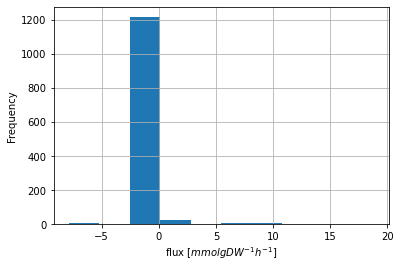

In [125]:
fig = solution.fluxes.hist()
fig.set_xlabel('flux [$mmol gDW^{-1} h^{-1}]$')
fig.set_ylabel('Frequency');

In [126]:
solution.fluxes[solution.fluxes != 0.]

EX_fe3_e      -0.000407
EX_glc__D_e   -1.700000
EX_ca2_e      -0.000378
EX_so4_e      -0.020092
EX_co2_e       5.980676
                 ...   
RNDR3          0.002050
TECA3S45       0.000215
PGK           -3.055820
PGM           -2.940945
PHCYT_BS       0.009060
Name: fluxes, Length: 337, dtype: float64

In [127]:
import escher

In [128]:
escher.list_available_maps()

[{'organism': 'Saccharomyces cerevisiae',
  'map_name': 'iMM904.Central carbon metabolism'},
 {'organism': 'Homo sapiens',
  'map_name': 'RECON1.Inositol retinol metabolism'},
 {'organism': 'Homo sapiens', 'map_name': 'RECON1.Glycolysis TCA PPP'},
 {'organism': 'Homo sapiens', 'map_name': 'RECON1.Tryptophan metabolism'},
 {'organism': 'Homo sapiens', 'map_name': 'RECON1.Carbohydrate metabolism'},
 {'organism': 'Homo sapiens',
  'map_name': 'RECON1.Amino acid metabolism (partial)'},
 {'organism': 'Escherichia coli', 'map_name': 'iJO1366.Nucleotide metabolism'},
 {'organism': 'Escherichia coli',
  'map_name': 'iJO1366.Fatty acid biosynthesis (saturated)'},
 {'organism': 'Escherichia coli',
  'map_name': 'iJO1366.Nucleotide and histidine biosynthesis'},
 {'organism': 'Escherichia coli', 'map_name': 'e_coli_core.Core metabolism'},
 {'organism': 'Escherichia coli', 'map_name': 'iJO1366.Central metabolism'},
 {'organism': 'Escherichia coli',
  'map_name': 'iJO1366.Fatty acid beta-oxidation'}

In [129]:
from escher import Builder